In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold

from skimage.io import imread, imshow, show, imshow_collection
from skimage.transform import resize, rescale, rotate

warnings.filterwarnings('ignore')

# Load Data

In [2]:
data_train_1 = pickle.load(open("data/data_train_flatten_batch_1.pkl", "rb"))
data_train_2 = pickle.load(open("data/data_train_flatten_batch_2.pkl", "rb"))
labels_train_1 = pickle.load(open("data/labels_train_batch_1.pkl", "rb"))
labels_train_2 = pickle.load(open("data/labels_train_batch_2.pkl", "rb"))

data_train = np.concatenate((data_train_1, data_train_2))
labels_train = np.concatenate((labels_train_1, labels_train_2))

data_test = pickle.load(open("data/data_test_flatten.pkl", "rb"))
labels_test = pickle.load(open("data/labels_test.pkl", "rb"))

# Shuffle train set
data_train, labels_train = shuffle(data_train, labels_train, random_state=25)

# Scale Data

In [3]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(data_train)
X_test_std = scaler.transform(data_test)

# Train Model

In [4]:
m = KNeighborsClassifier(n_jobs=4)

parameters = [{
    "n_neighbors": range(3, 25),
    "weights": ["uniform", "distance"]
}]

grid_search = GridSearchCV(m, parameters, verbose=3, scoring="f1_macro")
grid_search.fit(X_train_std, labels_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.307 total time=  32.6s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.314 total time=  31.8s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.317 total time=  32.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.298 total time=  31.2s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.317 total time=  31.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.329 total time=  31.1s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.337 total time=  31.8s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.347 total time=  32.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.327 total time=  30.4s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.346 total time=  30.4s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.315 total time=  32.7s
[CV 2/5] END ....n_neighbors=4, weights=uniform

[CV 2/5] END ...n_neighbors=13, weights=uniform;, score=0.321 total time=  36.3s
[CV 3/5] END ...n_neighbors=13, weights=uniform;, score=0.316 total time=  35.2s
[CV 4/5] END ...n_neighbors=13, weights=uniform;, score=0.305 total time=  35.8s
[CV 5/5] END ...n_neighbors=13, weights=uniform;, score=0.321 total time=  35.1s
[CV 1/5] END ..n_neighbors=13, weights=distance;, score=0.318 total time=  34.5s
[CV 2/5] END ..n_neighbors=13, weights=distance;, score=0.332 total time=  36.4s
[CV 3/5] END ..n_neighbors=13, weights=distance;, score=0.329 total time=  33.0s
[CV 4/5] END ..n_neighbors=13, weights=distance;, score=0.316 total time=  33.0s
[CV 5/5] END ..n_neighbors=13, weights=distance;, score=0.331 total time=  34.9s
[CV 1/5] END ...n_neighbors=14, weights=uniform;, score=0.305 total time=  34.4s
[CV 2/5] END ...n_neighbors=14, weights=uniform;, score=0.316 total time=  37.4s
[CV 3/5] END ...n_neighbors=14, weights=uniform;, score=0.317 total time=  35.9s
[CV 4/5] END ...n_neighbors=

[CV 4/5] END ...n_neighbors=23, weights=uniform;, score=0.294 total time=  25.8s
[CV 5/5] END ...n_neighbors=23, weights=uniform;, score=0.307 total time=  25.6s
[CV 1/5] END ..n_neighbors=23, weights=distance;, score=0.308 total time=  27.7s
[CV 2/5] END ..n_neighbors=23, weights=distance;, score=0.313 total time=  26.1s
[CV 3/5] END ..n_neighbors=23, weights=distance;, score=0.316 total time=  26.9s
[CV 4/5] END ..n_neighbors=23, weights=distance;, score=0.302 total time=  26.6s
[CV 5/5] END ..n_neighbors=23, weights=distance;, score=0.319 total time=  27.0s
[CV 1/5] END ...n_neighbors=24, weights=uniform;, score=0.296 total time=  26.7s
[CV 2/5] END ...n_neighbors=24, weights=uniform;, score=0.306 total time=  27.4s
[CV 3/5] END ...n_neighbors=24, weights=uniform;, score=0.309 total time=  27.1s
[CV 4/5] END ...n_neighbors=24, weights=uniform;, score=0.295 total time=  25.4s
[CV 5/5] END ...n_neighbors=24, weights=uniform;, score=0.305 total time=  26.4s
[CV 1/5] END ..n_neighbors=2

In [5]:
print("Model optimal parameters".upper())
print("n_neighbors:", model.get_params()["n_neighbors"])
print("weights:", model.get_params()["weights"])

MODEL OPTIMAL PARAMETERS
n_neighbors: 4
weights: distance


# Test Model

In [6]:
predictions = model.predict(X_test_std)

accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, average="macro")
recall = recall_score(labels_test, predictions, average="macro")
f1_macro = f1_score(labels_test, predictions, average="macro")

print("Accuracy score: {:.4f}%\nPrecision macro: {:.4f}%\nRecall macro: {:.4f}%\nF1 macro: {:.4f}%".format(accuracy*100, precision*100, recall*100, f1_macro*100))

Accuracy score: 35.7300%
Precision macro: 43.3596%
Recall macro: 35.7300%
F1 macro: 34.8712%


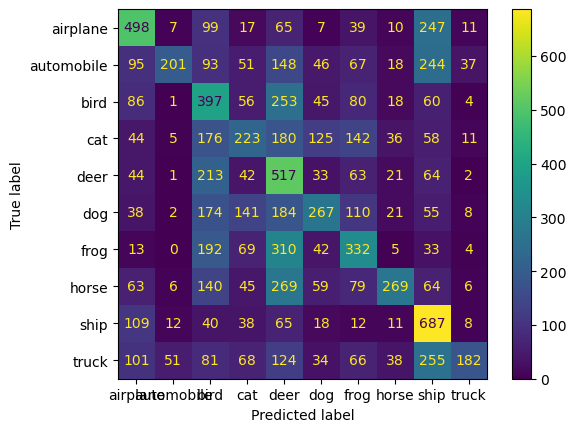

In [7]:
cm = confusion_matrix(labels_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Save Model

In [8]:
model_file_name = "knn.pkl"
pickle.dump(model, open(model_file_name, "wb"))

# Black And White

## Load data

In [9]:
train_batches = []
labels_batches = []

for i in [1, 2, 3, 4, 5]:
    data_filepath = "data/data_train_bw_flatten_batch_" + str(i) + ".pkl"
    labels_filepath = "data/labels_train_bw_batch_" + str(i) + ".pkl"
    train_batches.append(pickle.load(open(data_filepath, "rb")))
    labels_batches.append(pickle.load(open(labels_filepath, "rb")))
    
data_train_bw = np.concatenate(train_batches)
labels_train_bw = np.concatenate(labels_batches)

data_test_bw = pickle.load(open("data/data_test_bw_flatten.pkl", "rb"))
labels_test_bw = pickle.load(open("data/labels_test_bw.pkl", "rb"))

# Shuffle train set
data_train_bw, labels_train_bw = shuffle(data_train_bw, labels_train_bw, random_state=25)

## Scale data

In [10]:
scaler = StandardScaler()

X_train_std_bw = scaler.fit_transform(data_train_bw)
X_test_std_bw = scaler.transform(data_test_bw)

## Train model

In [11]:
m = KNeighborsClassifier(n_jobs=4)

parameters = [{
    "n_neighbors": range(3, 25),
    "weights": ["uniform", "distance"]
}]

grid_search = GridSearchCV(m, parameters, verbose=3, scoring="f1_macro")
grid_search.fit(X_train_std_bw, labels_train_bw)
model_bw = grid_search.best_estimator_

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.259 total time=  14.7s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.267 total time=  14.5s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.276 total time=  14.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.256 total time=  14.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.278 total time=  14.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.290 total time=  14.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.298 total time=  14.6s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.301 total time=  14.7s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.284 total time=  14.6s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.308 total time=  14.8s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.267 total time=  16.7s
[CV 2/5] END ....n_neighbors=4, weights=uniform

[CV 2/5] END ...n_neighbors=13, weights=uniform;, score=0.274 total time=  15.2s
[CV 3/5] END ...n_neighbors=13, weights=uniform;, score=0.276 total time=  15.3s
[CV 4/5] END ...n_neighbors=13, weights=uniform;, score=0.264 total time=  15.1s
[CV 5/5] END ...n_neighbors=13, weights=uniform;, score=0.277 total time=  15.2s
[CV 1/5] END ..n_neighbors=13, weights=distance;, score=0.278 total time=  15.5s
[CV 2/5] END ..n_neighbors=13, weights=distance;, score=0.285 total time=  15.3s
[CV 3/5] END ..n_neighbors=13, weights=distance;, score=0.290 total time=  15.2s
[CV 4/5] END ..n_neighbors=13, weights=distance;, score=0.276 total time=  15.2s
[CV 5/5] END ..n_neighbors=13, weights=distance;, score=0.290 total time=  15.2s
[CV 1/5] END ...n_neighbors=14, weights=uniform;, score=0.266 total time=  15.9s
[CV 2/5] END ...n_neighbors=14, weights=uniform;, score=0.273 total time=  15.3s
[CV 3/5] END ...n_neighbors=14, weights=uniform;, score=0.274 total time=  15.4s
[CV 4/5] END ...n_neighbors=

[CV 4/5] END ...n_neighbors=23, weights=uniform;, score=0.260 total time=  15.6s
[CV 5/5] END ...n_neighbors=23, weights=uniform;, score=0.271 total time=  15.9s
[CV 1/5] END ..n_neighbors=23, weights=distance;, score=0.266 total time=  15.9s
[CV 2/5] END ..n_neighbors=23, weights=distance;, score=0.274 total time=  15.6s
[CV 3/5] END ..n_neighbors=23, weights=distance;, score=0.274 total time=  15.3s
[CV 4/5] END ..n_neighbors=23, weights=distance;, score=0.265 total time=  15.2s
[CV 5/5] END ..n_neighbors=23, weights=distance;, score=0.281 total time=  15.4s
[CV 1/5] END ...n_neighbors=24, weights=uniform;, score=0.257 total time=  15.9s
[CV 2/5] END ...n_neighbors=24, weights=uniform;, score=0.263 total time=  15.6s
[CV 3/5] END ...n_neighbors=24, weights=uniform;, score=0.268 total time=  15.4s
[CV 4/5] END ...n_neighbors=24, weights=uniform;, score=0.256 total time=  15.2s
[CV 5/5] END ...n_neighbors=24, weights=uniform;, score=0.270 total time=  15.5s
[CV 1/5] END ..n_neighbors=2

In [12]:
print("Model optimal parameters".upper())
print("n_neighbors:", model_bw.get_params()["n_neighbors"])
print("weights:", model_bw.get_params()["weights"])

MODEL OPTIMAL PARAMETERS
n_neighbors: 3
weights: distance


## Test model

In [13]:
predictions_bw = model_bw.predict(X_test_std_bw)

accuracy_bw = accuracy_score(labels_test_bw, predictions_bw)
precision_bw = precision_score(labels_test_bw, predictions_bw, average="macro")
recall_bw = recall_score(labels_test_bw, predictions_bw, average="macro")
f1_macro_bw = f1_score(labels_test_bw, predictions_bw, average="macro")

print("Accuracy score: {:.4f}%\nPrecision macro: {:.4f}%\nRecall macro: {:.4f}%\nF1 macro: {:.4f}%".format(accuracy_bw*100, precision_bw*100, recall_bw*100, f1_macro_bw*100))

Accuracy score: 30.9600%
Precision macro: 38.0412%
Recall macro: 30.9600%
F1 macro: 30.5312%


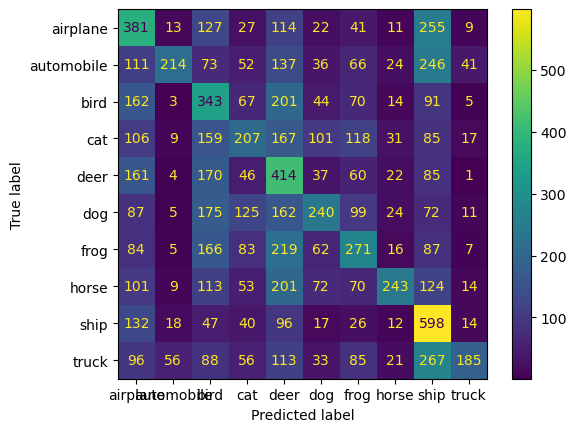

In [14]:
cm = confusion_matrix(labels_test_bw, predictions_bw, labels=model_bw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bw.classes_)
disp.plot()
plt.plot()

## Save model

In [15]:
model_file_name_bw = "knn_bw.pkl"
pickle.dump(model_bw, open(model_file_name_bw, "wb"))